# Classification Predict Team 9 Solution

© Explore Data Science Academy

---
### Honour Code

We {**TEAM 9**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Individual’s belief in climate change based on historical tweet data

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

# Lets start by importing all required Packages

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
import re
import nltk
from nltk import TreebankWordTokenizer, SnowballStemmer, PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import urllib
import langdetect 
from langdetect import detect
# Libraries for data preparation and model building
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, log_loss

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 100 ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df =pd.read_csv('train.csv') # load the data
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


**Exploratory data analysis** is an approach to analyzing data sets to summarize their main characteristics in other to draw meaningful patterns and insights. Lets begin by first reviewing valuable information about our data set.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


**Observations:**
1. The data set contains a total of 15819 rows and 3 columns.
2. The data set has three features.
3. The size of the data set is 370.9+ KB
4. Two features are Numerical variables while one is a categorical variable.

**Observation:** Two features are Numerical variables while one is a categorical variable.

In [20]:
df.describe().T # look at data statistics

,count,mean,std,min,25%,50%,75%,max
sentiment,15819.0,0.917504,0.836537,-1.0,1.0,1.0,1.0,2.0
tweetid,15819.0,501719.433656,289045.983132,6.0,253207.5,502291.0,753769.0,999888.0


**Observations:**
1. The feature sentiment has a mean value of 0.917504 and a standard deviation of 0.836537.
2. The feature tweetid has a mean value of 501719.433656 and a standard deviation of 289045.983132.
3. The feature sentiment has a minimum value of -1 and a maximum value of 2

In [21]:
df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

**Observations:** There no null values in the data set.

### Now let us look at both the Message feature distribution. 

In [22]:
df.groupby(['message','sentiment']).size().reset_index().rename(columns={0:'Message count'})

,message,sentiment,Message count
0,Trump taps climate change skeptic Scott Pruit...,2,1
1,yea your nudes are nice but what are your vie...,0,1
2,!! climate change should not be a partisan iss...,1,1
3,#24hwatchparty #SimonDonner Climate Scientist ...,2,1
4,#3Novices : G-20 fails to agree on free trade ...,1,1
...,...,...,...
14228,�� Most Americans want 'aggressive' action on ...,2,1
14229,�� namikawas: weavemama: maybe gangster whales...,0,1
14230,����will continue to lead in climate change &a...,1,1
14231,📢 #ClimateChange \nPeople prepare to fight the...,2,1


**Observations:** Some tweet messages sentiments were expressed twice. 

### A closer look at the Sentiment frequency Distribution

#### First we count the values of each Sentiment and visualize the frequency distribution with a pie chart

In [23]:
x=df['sentiment'].value_counts()

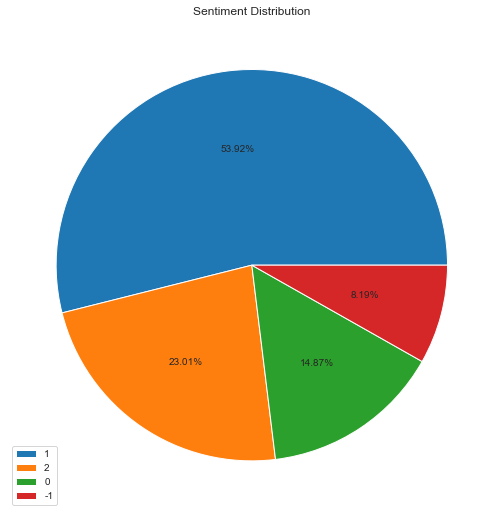

In [24]:
labels=df['sentiment'].unique()
fig = plt.figure(figsize=(15,9));
plt.pie (x,data=df, autopct='%1.2f%%')
plt.show
plt.title ('Sentiment Distribution')
plt.legend(labels, loc='best')
# plot relevant feature interactions

<AxesSubplot:xlabel='sentiment', ylabel='count'>

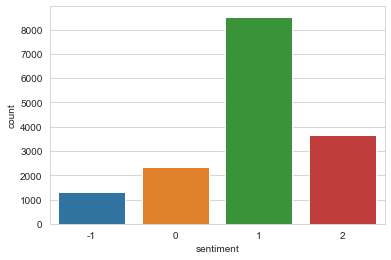

In [25]:
#Counter plotting the sentiment column to view the proportion of each label
#ie. Checking the most popular target

sns.set_style('whitegrid')
sns.countplot(x='sentiment', data=df)

**Observations:**
1. The feature sentiment of 1 has the highest frequency distribution of 53.92%, which means it is the most occuring of other sentiment values.
2. The lowest or least occuring is the -1 sentiment. Its percentage frequency distribution is 8.19%. 

array([[<AxesSubplot:title={'center':'sentiment'}>,
        <AxesSubplot:title={'center':'tweetid'}>]], dtype=object)

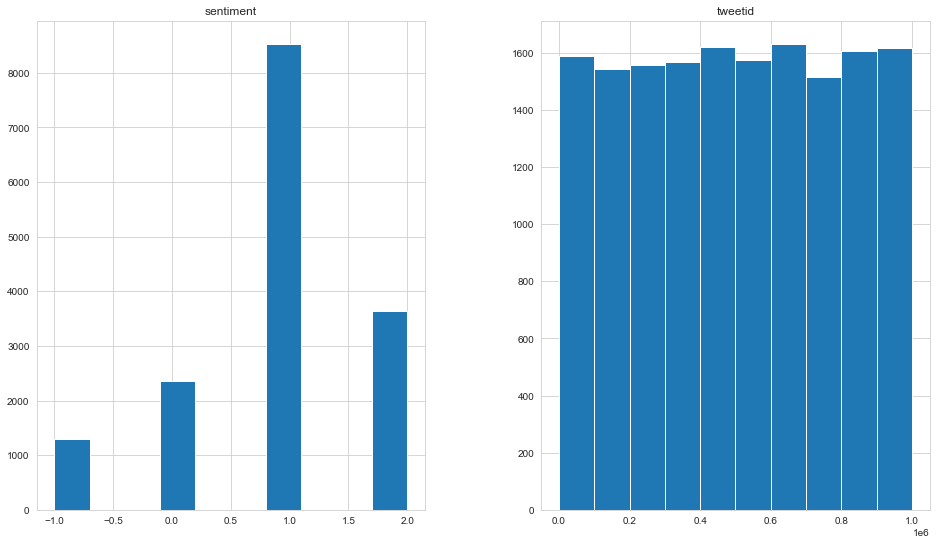

In [26]:
df.hist(figsize=(16,9))

**Observations:** Histogram showing frequency distribution for tweetid and sentiment.

<AxesSubplot:xlabel='tweetid'>

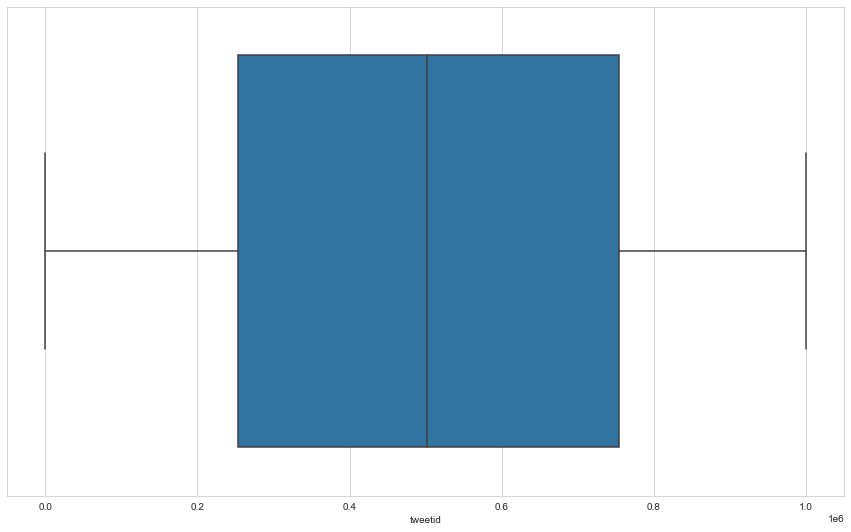

In [27]:
fig = plt.figure(figsize=(15,9));
sns.boxplot(x='tweetid', data=df)  # have a look at feature distributions

**Observations:** Statistical look of the tweetid feature show no outliers present.

In [28]:
df.corr()# evaluate correlation

,sentiment,tweetid
sentiment,1.000000,-0.003758
tweetid,-0.003758,1.000000


**Observations:** Data set correlation shows that there are no positive or negative correlation, hence no room for multi-collinearity

In [29]:
# create a wordcloud
text = " ".join(cat.split()[0] for cat in df.message)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

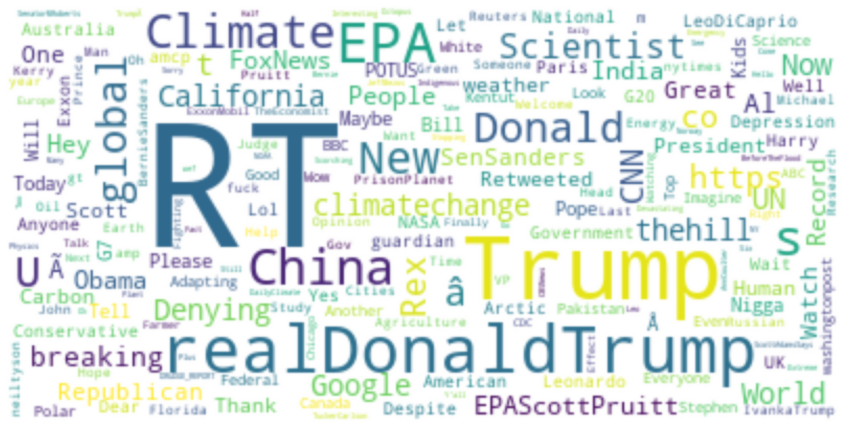

In [30]:
fig = plt.figure(figsize=(15,9));
plt.imshow(word_cloud, interpolation='gaussian')
plt.axis("off")
plt.show()

**Observation:** The bold and clear words are words that occur the most. 

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [3]:
# remove missing values/ features
df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

### The step we would take is to determine if the target variable for prediction is balanced

<AxesSubplot:xlabel='sentiment', ylabel='count'>

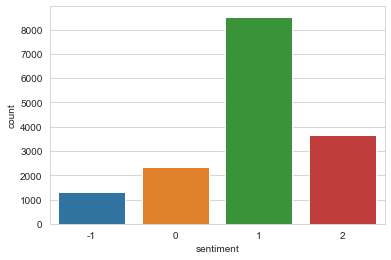

In [4]:
#Before balancing our data
sns.set_style('whitegrid')
sns.countplot(x='sentiment', data=df)

In [5]:
# Separate minority and majority classes
great = df[df['sentiment']==2]
good = df[df['sentiment']==1]
neutral = df[df['sentiment']==0]
bad = df[df['sentiment']==-1]

In [6]:
#Checcking the lengths of all target values
len(great), len(good), len(neutral), len(bad)

(3640, 8530, 2353, 1296)

**Observations:** The Target variable is imbalanced, hence we would balanced the variable by combining both the downward and upward re-sampling

#### Balancing

In [7]:
#Downsample the leading sentiment
def balanced(majority, minority1, minority2, minority3):
    #Downsaple majority
    majority_downsampled = resample(majority,
                          replace=False,  # sample without replacement (no need to duplicate observations)
                          n_samples=len(minority1), # match number in minority class
                          random_state=27) # reproducible results

    # Combine downsampled majority class with minority class
    #downsampled = pd.concat([majority_downsampled, minority1])
    
    
    # Upsample minority
    minority_upsampled = resample(minority2 ,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=len(minority1), # match number in minority class
                          random_state=27) # reproducible results

    # Combine upsampled minority class with majority class
    #upsampled = pd.concat([minority_upsampled, downsampled])
    
    # Upsample minority
    minority_upsampled2 = resample(minority3 ,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=len(minority1), # match number in minority class
                          random_state=27) # reproducible results
    
    

    # Combine upsampled minority class with majority class
    resampled_final = pd.concat([minority_upsampled2, minority_upsampled,majority_downsampled, minority1])
    

    # Check new class counts
    #upsampled['spam'].value_counts()
    
    return resampled_final



In [8]:
balanced_df = balanced(good, great, neutral, bad)

In [9]:
# Check new class counts
balanced_df['sentiment'].value_counts()

-1    3640
 0    3640
 1    3640
 2    3640
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

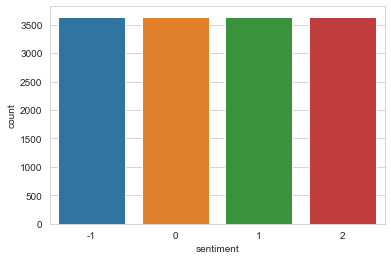

In [10]:
#After balancing our data
sns.set_style('whitegrid')
sns.countplot(x='sentiment', data=balanced_df)

#### Comment: All four observations in our sentiment column have been balanced

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more classification models that are able to accurately predict the sentiments. |

---

**Lets start by differentiating our target variable with our independent variable**

In [11]:
X = balanced_df.message
y = balanced_df.sentiment

We decided to start our building our model with TfidfVectorizer. Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector. It combines 2 concepts, Term Frequency (TF) and Document Frequency (DF).

In [12]:
vct = TfidfVectorizer()
train_x_vecs = vct.fit_transform(X)

We split our Train data set into 80% train data and 20% test data. The train data would enable us build our model and the test data would enable our trained model to understand any unseen data.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(train_x_vecs, y, test_size=0.2, random_state = 42)

We built our model using all five methods namely:
    1. Spport Vector Machine
    2. Random Forest Classifier
    3. Logistic Regression
    4. Naive Bayes
    5. K nearest Neigbhor

In [14]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,4,8,15],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes': {
        'model': BernoulliNB(),
        'params': {
            
        }
    },
    'knn': {
        'model': KNeighborsClassifier(n_neighbors = 5),
        'params': {
        
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2

The above DataFrame shows the Parameters Obtained using all five Models

In [105]:
test_df =pd.read_csv('test.csv') # load the data
test_df.head()


,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [106]:
test_df = test_df.message
test_df.head()

0    Europe will now be looking to China to make su...
1    Combine this with the polling of staffers re c...
2    The scary, unimpeachable evidence that climate...
3    @Karoli @morgfair @OsborneInk @dailykos \nPuti...
4    RT @FakeWillMoore: 'Female orgasms cause globa...
Name: message, dtype: object

In [167]:
#New vectorizer

vct = TfidfVectorizer()
test_x_vecs = vct.transform(test_df)

In [184]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', C=12)
svc.fit(X_train1, y_train1)
y_pred = svc.predict(X_test1)

print("The accuracy score of the SVC is:", accuracy_score(y_test1, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test1, y_pred))

The accuracy score of the SVC is: 0.8485576923076923


Classification Report:

               precision    recall  f1-score   support

          -1       0.96      0.93      0.94       719
           0       0.88      0.85      0.86       768
           1       0.75      0.73      0.74       720
           2       0.80      0.89      0.84       705

    accuracy                           0.85      2912
   macro avg       0.85      0.85      0.85      2912
weighted avg       0.85      0.85      0.85      2912



In [186]:
y_pred3 = svc.predict(test_x_vecs)

In [187]:
tuned = pd.DataFrame(list(zip(test2, y_pred3)), columns = ['tweetid','sentiment'])
tuned.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0


In [188]:
tuned.to_csv('Support Vector 2 submission.csv', index_label = False, index = False)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic